# 异常数据分析

In [55]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.layers import Input, Lambda
from keras.applications import Xception, xception

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##  数据读取

In [39]:

data_path_train = './dataset-mini-6-3/train'
image_names_train = os.listdir(data_path_train)
input_shape = (299, 299, 3)
trains = []
labels = []

# 处理标准的训练数据
for i in tqdm(range(len(image_names_train))):
    image_name = image_names_train[i]
    image_path = os.path.join(data_path_train, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (input_shape[0], input_shape[1]))
    trains.append(image[:, :, ::-1])
    # cat: 0, dog: 1
    category = 1 if 'dog' in image_name else 0
    labels.append(category)

print('done')

100%|██████████| 6/6 [00:00<00:00, 262.92it/s]

done


## 预测

In [41]:
# ImageNet 1000个类 具体内容
# 来源于：https://blog.csdn.net/zhangjunbob/article/details/53258524

dogs = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']

cats=[
'n02123045','n02123159','n02123394','n02123597'
,'n02124075','n02125311','n02127052']

In [65]:
x = Input(shape=input_shape)
x = Lambda(xception.preprocess_input)(x)
model = Xception(input_tensor=x, input_shape=input_shape, weights='imagenet')

bad_imgs = []
for i in tqdm(range(len(trains))):
    X = np.expand_dims(trains[0], axis=0)
    pred = model.predict(X)
    de_pred = xception.decode_predictions(preds, top=20)[0]
    print(image_names_train[i], de_pred)
    label = labels[i]
    types = dogs if labels[i] == 1 else cats
    de_pred = [item[0] for item in de_pred if (item[0] in types)]
    if (len(de_pred) == 0):
        bad_imgs.append(image_names_train[i])

print(bad_imgs)
    

 17%|█▋        | 1/6 [00:10<00:52, 10.50s/it]

dog.22.jpg [('n02123159', 'tiger_cat', 0.24122974), ('n02123045', 'tabby', 0.093078084), ('n02124075', 'Egyptian_cat', 0.044285022), ('n02094258', 'Norwich_terrier', 0.038235359), ('n02094114', 'Norfolk_terrier', 0.028461147), ('n02113023', 'Pembroke', 0.027650716), ('n02113186', 'Cardigan', 0.01435001), ('n02096294', 'Australian_terrier', 0.01024631), ('n02123597', 'Siamese_cat', 0.0081659704), ('n03642806', 'laptop', 0.0080874981), ('n03207941', 'dishwasher', 0.006497778), ('n04367480', 'swab', 0.0062967376), ('n02808440', 'bathtub', 0.0060793823), ('n04070727', 'refrigerator', 0.005895304), ('n02110806', 'basenji', 0.0054441076), ('n02971356', 'carton', 0.0054037455), ('n03958227', 'plastic_bag', 0.0053498358), ('n02086079', 'Pekinese', 0.0050335447), ('n03201208', 'dining_table', 0.0046977084), ('n02096177', 'cairn', 0.0042498298)]


 33%|███▎      | 2/6 [00:11<00:22,  5.59s/it]

cat.0.jpg [('n02123159', 'tiger_cat', 0.24122974), ('n02123045', 'tabby', 0.093078084), ('n02124075', 'Egyptian_cat', 0.044285022), ('n02094258', 'Norwich_terrier', 0.038235359), ('n02094114', 'Norfolk_terrier', 0.028461147), ('n02113023', 'Pembroke', 0.027650716), ('n02113186', 'Cardigan', 0.01435001), ('n02096294', 'Australian_terrier', 0.01024631), ('n02123597', 'Siamese_cat', 0.0081659704), ('n03642806', 'laptop', 0.0080874981), ('n03207941', 'dishwasher', 0.006497778), ('n04367480', 'swab', 0.0062967376), ('n02808440', 'bathtub', 0.0060793823), ('n04070727', 'refrigerator', 0.005895304), ('n02110806', 'basenji', 0.0054441076), ('n02971356', 'carton', 0.0054037455), ('n03958227', 'plastic_bag', 0.0053498358), ('n02086079', 'Pekinese', 0.0050335447), ('n03201208', 'dining_table', 0.0046977084), ('n02096177', 'cairn', 0.0042498298)]


 50%|█████     | 3/6 [00:11<00:11,  3.99s/it]

cat.1.jpg [('n02123159', 'tiger_cat', 0.24122974), ('n02123045', 'tabby', 0.093078084), ('n02124075', 'Egyptian_cat', 0.044285022), ('n02094258', 'Norwich_terrier', 0.038235359), ('n02094114', 'Norfolk_terrier', 0.028461147), ('n02113023', 'Pembroke', 0.027650716), ('n02113186', 'Cardigan', 0.01435001), ('n02096294', 'Australian_terrier', 0.01024631), ('n02123597', 'Siamese_cat', 0.0081659704), ('n03642806', 'laptop', 0.0080874981), ('n03207941', 'dishwasher', 0.006497778), ('n04367480', 'swab', 0.0062967376), ('n02808440', 'bathtub', 0.0060793823), ('n04070727', 'refrigerator', 0.005895304), ('n02110806', 'basenji', 0.0054441076), ('n02971356', 'carton', 0.0054037455), ('n03958227', 'plastic_bag', 0.0053498358), ('n02086079', 'Pekinese', 0.0050335447), ('n03201208', 'dining_table', 0.0046977084), ('n02096177', 'cairn', 0.0042498298)]


 67%|██████▋   | 4/6 [00:12<00:06,  3.24s/it]

dog.0.jpg [('n02123159', 'tiger_cat', 0.24122974), ('n02123045', 'tabby', 0.093078084), ('n02124075', 'Egyptian_cat', 0.044285022), ('n02094258', 'Norwich_terrier', 0.038235359), ('n02094114', 'Norfolk_terrier', 0.028461147), ('n02113023', 'Pembroke', 0.027650716), ('n02113186', 'Cardigan', 0.01435001), ('n02096294', 'Australian_terrier', 0.01024631), ('n02123597', 'Siamese_cat', 0.0081659704), ('n03642806', 'laptop', 0.0080874981), ('n03207941', 'dishwasher', 0.006497778), ('n04367480', 'swab', 0.0062967376), ('n02808440', 'bathtub', 0.0060793823), ('n04070727', 'refrigerator', 0.005895304), ('n02110806', 'basenji', 0.0054441076), ('n02971356', 'carton', 0.0054037455), ('n03958227', 'plastic_bag', 0.0053498358), ('n02086079', 'Pekinese', 0.0050335447), ('n03201208', 'dining_table', 0.0046977084), ('n02096177', 'cairn', 0.0042498298)]


 83%|████████▎ | 5/6 [00:13<00:02,  2.77s/it]

dog.2.jpg [('n02123159', 'tiger_cat', 0.24122974), ('n02123045', 'tabby', 0.093078084), ('n02124075', 'Egyptian_cat', 0.044285022), ('n02094258', 'Norwich_terrier', 0.038235359), ('n02094114', 'Norfolk_terrier', 0.028461147), ('n02113023', 'Pembroke', 0.027650716), ('n02113186', 'Cardigan', 0.01435001), ('n02096294', 'Australian_terrier', 0.01024631), ('n02123597', 'Siamese_cat', 0.0081659704), ('n03642806', 'laptop', 0.0080874981), ('n03207941', 'dishwasher', 0.006497778), ('n04367480', 'swab', 0.0062967376), ('n02808440', 'bathtub', 0.0060793823), ('n04070727', 'refrigerator', 0.005895304), ('n02110806', 'basenji', 0.0054441076), ('n02971356', 'carton', 0.0054037455), ('n03958227', 'plastic_bag', 0.0053498358), ('n02086079', 'Pekinese', 0.0050335447), ('n03201208', 'dining_table', 0.0046977084), ('n02096177', 'cairn', 0.0042498298)]


100%|██████████| 6/6 [00:14<00:00,  2.49s/it]

cat.11.jpg [('n02123159', 'tiger_cat', 0.24122974), ('n02123045', 'tabby', 0.093078084), ('n02124075', 'Egyptian_cat', 0.044285022), ('n02094258', 'Norwich_terrier', 0.038235359), ('n02094114', 'Norfolk_terrier', 0.028461147), ('n02113023', 'Pembroke', 0.027650716), ('n02113186', 'Cardigan', 0.01435001), ('n02096294', 'Australian_terrier', 0.01024631), ('n02123597', 'Siamese_cat', 0.0081659704), ('n03642806', 'laptop', 0.0080874981), ('n03207941', 'dishwasher', 0.006497778), ('n04367480', 'swab', 0.0062967376), ('n02808440', 'bathtub', 0.0060793823), ('n04070727', 'refrigerator', 0.005895304), ('n02110806', 'basenji', 0.0054441076), ('n02971356', 'carton', 0.0054037455), ('n03958227', 'plastic_bag', 0.0053498358), ('n02086079', 'Pekinese', 0.0050335447), ('n03201208', 'dining_table', 0.0046977084), ('n02096177', 'cairn', 0.0042498298)]
[]


## 展示异常数据

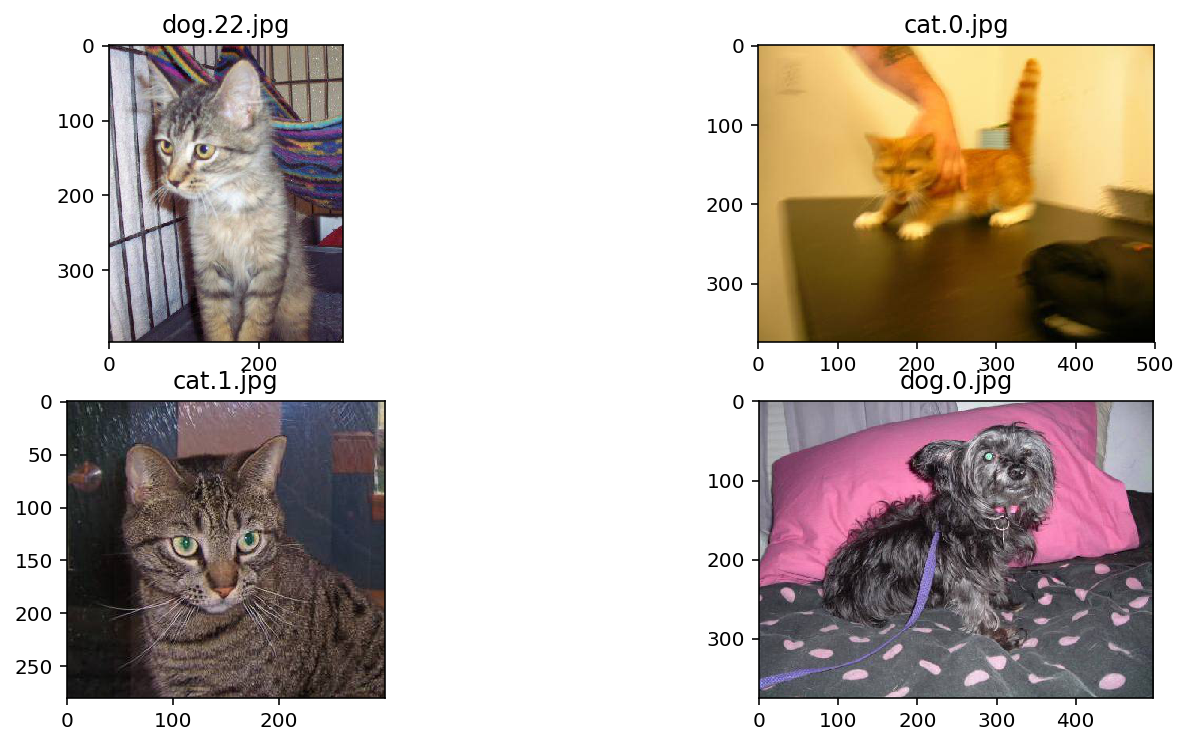

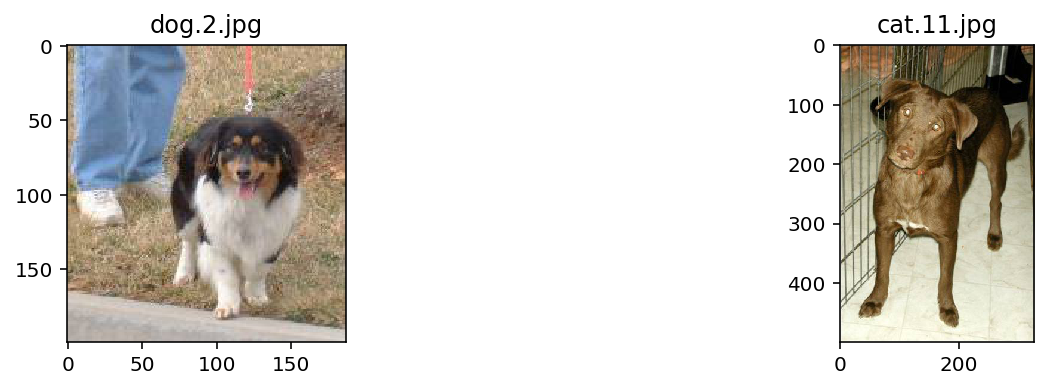

In [64]:

bad_imgs = image_names_train

group = 4
for i in range(math.ceil(len(bad_imgs) / group)):
    plt.figure(figsize=(12, 6))
    for j in range(group):
        index = group * i + j
        if index >= len(bad_imgs):
            break
        img = cv2.imread(os.path.join(data_path_train, bad_imgs[index]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, math.ceil(group / 2), j + 1)
        plt.imshow(img)
        plt.title(image_names_train[index])
    plt.show()
    